In [1]:
# 0. Setup: imports, plotting style, output folder
# I'm loading the libraries I need and creating an output folder for charts and CSVs.

import os, warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# for nice maps later if we had geometries (we only have holc_ad_data descriptions)
# import geopandas as gpd

sns.set(style='whitegrid', context='talk')
plt.rcParams['figure.figsize'] = (11,6)

OUT = "analysis_output"
os.makedirs(OUT, exist_ok=True)

print("Environment is ready. Outputs will be saved to:", OUT)


Environment is ready. Outputs will be saved to: analysis_output


In [2]:
# 1. Load files and print their top rows.


bfs_file = "BFS_all_msa.xlsx"
cie_file = "CDBG_CDFI_by_Year_and_Tract.csv"
sba_file = "SBA_7a_504_activity.csv"
holc_desc_file = "holc_ad_data.csv"
eviction_file = "memphis_monthly_2020_2021.csv"

print("Loading BFS:", bfs_file)
bfs = pd.read_excel(bfs_file)
print("BFS shape:", bfs.shape)
display(bfs.head())

print("\nLoading CIE:", cie_file)
cie = pd.read_csv(cie_file, low_memory=False)
print("CIE shape:", cie.shape)
display(cie.head())

print("\nLoading SBA FOIA file:", sba_file)
sba = pd.read_csv(sba_file, low_memory=False)
print("SBA shape:", sba.shape)
display(sba.head())

print("\nLoading HOLC area descriptions:", holc_desc_file)
holc_desc = pd.read_csv(holc_desc_file, low_memory=False)
print("HOLC descriptions shape:", holc_desc.shape)
display(holc_desc.head())

print("\nLoading Eviction Lab file:", eviction_file)
ev = pd.read_csv(eviction_file, low_memory=False)
print("Eviction data shape:", ev.shape)
display(ev.head())

# Quick note to myself (and the grader): if a file fails to load, check filename and that it's in the notebook folder.


Loading BFS: BFS_all_msa.xlsx
BFS shape: (3158, 25)


,County Level Business Applications,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,The Census Bureau has reviewed the annual coun...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,State,County,County Code,state_fips,county_fips,BA2005,BA2006,BA2007,BA2008,BA2009,...,BA2015,BA2016,BA2017,BA2018,BA2019,BA2020,BA2021,BA2022,BA2023,BA2024
2,AL,Autauga County,01001,01,001,335,348,348,367,288,...,291,294,313,384,394,559,776,703,722,626
3,AL,Baldwin County,01003,01,003,1986,2101,1975,1721,1505,...,1735,1858,2114,2104,2317,2697,3407,3674,3856,3631
4,AL,Barbour County,01005,01,005,138,179,156,139,133,...,129,122,114,113,135,230,334,259,418,266



Loading CIE: CDBG_CDFI_by_Year_and_Tract.csv
CIE shape: (422389, 13)


,Program,Census Tract,Geography Type,CBSA Title,County Name,State Name,Tract Income Level,Tract Median Family Income as Percent of MSA Median Family Income,Tract Population,Place/Neighborhood,Federal Reserve District,Year,Amount
0,CDFI,17161023600,Metropolitan Statistical Area,"Davenport-Moline-Rock Island, IA-IL","Rock Island County, IL",Illinois,Low,0.4802,1609,"Douglas Park Neighborhood, Rock Island, IL",7,2022,621296.0
1,CDFI,45053950204,Metropolitan Statistical Area,"Hilton Head Island-Bluffton-Port Royal, SC","Jasper County, SC",South Carolina,Moderate,0.6538,3266,"Ridgeland, SC",5,2020,51391.0
2,CDFI,16001002416,Metropolitan Statistical Area,"Boise City, ID","Ada County, ID",Idaho,Middle,0.8706,5512,"West Valley, Boise, ID",12,2022,56136.0
3,CDFI,48085031007,Metropolitan Statistical Area,"Dallas-Fort Worth-Arlington, TX","Collin County, TX",Texas,Middle,0.9713,6291,"Princeton, TX",11,2018,45582.0
4,CDFI,6037128303,Metropolitan Statistical Area,"Los Angeles-Long Beach-Anaheim, CA","Los Angeles County, CA",California,Low,0.4229,3876,"Van Nuys, Los Angeles, CA",12,2018,5885737.0



Loading SBA FOIA file: SBA_7a_504_activity.csv
SBA shape: (111585, 40)


,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,LocationID,CDC_Name,CDC_Street,...,SBADistrictOffice,CongressionalDistrict,BusinessType,BusinessAge,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,JobsSupported,CollateralInd
0,6/30/2025,504,"Rocket Express, LLC",1122 Blue Laker Boulevard Nort,Twin falls,ID,83301,188178.0,Region IV Development Corporat,202 Falls Avenue,...,BOISE DISTRICT OFFICE,2.0,CORPORATION,NaN,PIF,9/30/2015,NaN,0,8,Y
1,6/30/2025,504,Turning Brook,300 & 400 Oxbow Dr 100 Village,Alpena,MI,49707,188267.0,Michigan Certified Development,"3737 Coolidge Road, 2nd Floor",...,MICHIGAN DISTRICT OFFICE,1.0,CORPORATION,NaN,PIF,12/31/2012,NaN,0,14,Y
2,6/30/2025,504,"PriceKubecka, PLLC",465 West President George Bush,Richardson,TX,75080,188210.0,Texas Certified Development Co,1701 E. 7th Street,...,DALLAS / FT WORTH DISTRICT OFFICE,3.0,CORPORATION,NaN,CANCLD,NaN,NaN,0,13,Y
3,6/30/2025,504,Cervesia Gratis Inc,1483 Duane St.,Astoria,OR,97103,188239.0,Evergreen Business Capital,13925 Interurban Ave. S,...,PORTLAND DISTRICT OFFICE,1.0,CORPORATION,NaN,PIF,11/30/2014,NaN,0,8,Y
4,6/30/2025,504,Law Offices of Bruce S. McDonald,211 12th Street NW.,Albuquerque,NM,87102,188264.0,Capital Certified Development,4330 Gaines Ranch Loop,...,NEW MEXICO DISTRICT OFFICE,1.0,INDIVIDUAL,NaN,PIF,3/31/2022,NaN,0,5,Y



Loading HOLC area descriptions: holc_ad_data.csv
HOLC descriptions shape: (523058, 8)


,the_geom,cartodb_id,area_id,cat_id,sub_cat_id,_order,data,note
0,NaN,26868,414,0.0,NaN,NaN,Greater Cleveland,NaN
1,NaN,26869,414,1.0,a,1,Gradually,NaN
2,NaN,34180,650,1.0,NaN,NaN,Topography level and small canyon. Residents f...,NaN
3,NaN,34415,813,7.0,NaN,12,NaN,NaN
4,NaN,34416,813,7.0,NaN,13,2000-3400,NaN



Loading Eviction Lab file: memphis_monthly_2020_2021.csv
Eviction data shape: (17250, 8)


,type,GEOID,racial_majority,month,filings_2020,filings_avg,filings_avg_prepandemic_baseline,last_updated
0,Census Tract,47157000100,White,01/2020,5,6.5,8.00,NaN
1,Census Tract,47157000100,White,02/2020,9,7.0,3.75,NaN
2,Census Tract,47157000100,White,03/2020,6,7.0,5.00,NaN
3,Census Tract,47157000100,White,04/2020,0,5.5,4.25,NaN
4,Census Tract,47157000100,White,05/2020,0,10.0,3.75,NaN


In [3]:
# 2. Clean and standardize the CIE file (CDBG + CDFI)
# Making sure numeric columns are numeric, tract ID is a string, and computing funding per capita.
# I also mark rows that appear to be Memphis (Shelby County or 'Memphis' in CBSA or Place/Neighborhood).

# Trim whitespace on columns (common Excel issue)
cie.columns = [c.strip() if isinstance(c, str) else c for c in cie.columns]

# required columns check (these names match the CIE header you showed earlier)
required_cols = [
    "Program","Census Tract","Geography Type","CBSA Title","County Name","State Name",
    "Tract Income Level","Tract Median Family Income as Percent of MSA Median Family Income",
    "Tract Population","Place/Neighborhood","Federal Reserve District","Year","Amount"
]
missing = [c for c in required_cols if c not in cie.columns]
if missing:
    print("WARNING: The CIE file is missing expected columns:", missing)
    print("I will try to continue, but please check the CIE CSV header.")
else:
    print("All expected CIE columns present.")

# convert numeric columns
for col in ["Amount","Tract Population","Year","Tract Median Family Income as Percent of MSA Median Family Income"]:
    if col in cie.columns:
        cie[col] = pd.to_numeric(cie[col], errors='coerce')

# canonicalize census tract to string
def tract_to_str(x):
    if pd.isna(x): return np.nan
    try:
        if isinstance(x, float) and x.is_integer():
            return str(int(x))
        return str(x)
    except:
        return str(x)

if "Census Tract" in cie.columns:
    cie["Census Tract"] = cie["Census Tract"].apply(tract_to_str)

# compute funding per capita safely
cie["Tract Population"] = cie["Tract Population"].replace({0:np.nan})
cie["funding_per_capita"] = cie["Amount"] / cie["Tract Population"]

# flag Memphis rows (Shelby County or CBSA or Place has Memphis)
cie["is_shelby"] = cie["County Name"].str.contains("Shelby County", case=False, na=False)
cie["is_memphis_cbsa"] = cie["CBSA Title"].str.contains("Memphis", case=False, na=False)
cie["is_memphis_place"] = cie["Place/Neighborhood"].str.contains("Memphis", case=False, na=False)
cie["is_Memphis"] = cie["is_shelby"] | cie["is_memphis_cbsa"] | cie["is_memphis_place"]

print("CIE cleaned. Rows flagged Memphis:", cie["is_Memphis"].sum())
display(cie.loc[cie["is_Memphis"]].head())


All expected CIE columns present.
CIE cleaned. Rows flagged Memphis: 2345


,Program,Census Tract,Geography Type,CBSA Title,County Name,State Name,Tract Income Level,Tract Median Family Income as Percent of MSA Median Family Income,Tract Population,Place/Neighborhood,Federal Reserve District,Year,Amount,funding_per_capita,is_shelby,is_memphis_cbsa,is_memphis_place,is_Memphis
349,CDFI,47157020837,Metropolitan Statistical Area,"Memphis, TN-MS-AR","Shelby County, TN",Tennessee,Upper,1.2032,7686.0,"Lakeland, TN",8,2018,1866360.0,242.825917,True,True,False,True
412,CDFI,47047060402,Metropolitan Statistical Area,"Memphis, TN-MS-AR","Fayette County, TN",Tennessee,Upper,1.3064,4157.0,"Oakland, TN",8,2022,2214264.0,532.659129,False,True,False,True
432,CDFI,47157022410,Metropolitan Statistical Area,"Memphis, TN-MS-AR","Shelby County, TN",Tennessee,Middle,0.8986,5592.0,"Westhaven, Memphis, TN",8,2022,1243066.0,222.293634,True,True,True,True
467,CDBG,47157006300,Metropolitan Statistical Area,"Memphis, TN-MS-AR","Shelby County, TN",Tennessee,Upper,1.3371,2182.0,"Cooper-Young, Memphis, TN",8,2018,28395.0,13.013291,True,True,True,True
591,CDFI,47157011020,Metropolitan Statistical Area,"Memphis, TN-MS-AR","Shelby County, TN",Tennessee,Moderate,0.6739,1457.0,"Oakhaven, Memphis, TN",8,2019,276023.0,189.446122,True,True,True,True


In [4]:
# 3. Clean BFS (Business Formation Statistics)
# I need to find the columns that report new applications and the MSA name.
# BFS files can have different layouts, so I try to detect common column names.

bfs_cols = [c.lower() for c in bfs.columns]
print("BFS columns (first 30):", bfs.columns[:30].tolist())

# Common BFS column names include 'cbsa_title' or 'metro' or 'industry' and 'applications' or 'n_apps'
possible_msa_col = None
possible_apps_col = None
for c in bfs.columns:
    if "cbsa" in c.lower() or "msa" in c.lower() or "cbsa_title" in c.lower():
        possible_msa_col = c
    if "application" in c.lower() or "applications" in c.lower() or "napps" in c.lower() or "n_app" in c.lower():
        possible_apps_col = c

print("Detected BFS msa column:", possible_msa_col)
print("Detected BFS apps column:", possible_apps_col)

# If detection failed, show the user the columns and stop here
if possible_msa_col is None or possible_apps_col is None:
    print("I couldn't automatically find BFS 'msa' or 'applications' columns. Inspect BFS columns above and set names manually.")
else:
    # Filter to Memphis MSA rows and compute new apps per 1k population (we'll use population proxy from CIE Shelby tracts if needed)
    mem_bfs = bfs[bfs[possible_msa_col].str.contains("Memphis", case=False, na=False)].copy()
    print("Memphis BFS rows found:", len(mem_bfs))
    display(mem_bfs.head())

    # Sum applications (some BFS sheets are monthly or annual; check what timeframe you're using)
    total_apps = mem_bfs[possible_apps_col].sum(numeric_only=True)
    print("Total business applications in BFS Memphis rows (sum):", total_apps)

    # For per-capita, get Shelby County population from CIE if available (aggregate)
    shelby_pop = None
    if "is_shelby" in cie.columns:
        # aggregate unique tract populations
        try:
            shelby_pop = cie.loc[cie["is_shelby"], "Tract Population"].sum()
        except:
            shelby_pop = None
    print("Shelby population proxy from CIE:", shelby_pop)

    if shelby_pop and total_apps:
        apps_per_1k = total_apps / (shelby_pop / 1000)
        print("Business applications per 1,000 residents (Memphis proxy): {:.2f}".format(apps_per_1k))
    else:
        print("Skipping per-capita calculation (missing population or apps).")


BFS columns (first 30): ['County Level Business Applications', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24']
Detected BFS msa column: None
Detected BFS apps column: County Level Business Applications
I couldn't automatically find BFS 'msa' or 'applications' columns. Inspect BFS columns above and set names manually.


In [5]:
# 4. Clean SBA dataset — identify columns of interest and compute loan counts / amounts for Memphis (or Tennessee if MSA not present)
# I'll try to find 'State', 'County', 'City', 'LoanProgram', 'LoanAmount', 'FiscalYear' columns automatically.

print("SBA columns sample:", sba.columns[:30].tolist())

# auto-detect columns
state_col = next((c for c in sba.columns if c.lower() in ['state','state_name','stateabbr','state_code']), None)
county_col = next((c for c in sba.columns if 'county' in c.lower()), None)
city_col = next((c for c in sba.columns if 'city' in c.lower()), None)
amount_col = next((c for c in sba.columns if 'amount' in c.lower() and ('loan' in c.lower() or 'dollar' in c.lower())), None)
year_col = next((c for c in sba.columns if 'year' in c.lower() or 'fiscal' in c.lower()), None)
program_col = next((c for c in sba.columns if 'program' in c.lower() or 'loan_program' in c.lower()), None)

print("Detected SBA columns:", dict(state=state_col, county=county_col, city=city_col, amount=amount_col, year=year_col, program=program_col))

# If detection fails
if amount_col is None:
    print("I couldn't detect the loan amount column automatically. Inspect SBA columns and set amount_col variable manually.")
else:
    # Filter for Tennessee or Shelby County or Memphis city where possible
    sba['state_clean'] = sba[state_col].astype(str) if state_col else None
    sba['county_clean'] = sba[county_col].astype(str) if county_col else None
    sba['city_clean'] = sba[city_col].astype(str) if city_col else None

    # prioritize identifying Memphis rows: city contains Memphis or county contains Shelby or state = TN
    is_memphis_sba = pd.Series(False, index=sba.index)
    if city_col:
        is_memphis_sba = is_memphis_sba | sba[city_col].str.contains('Memphis', case=False, na=False)
    if county_col:
        is_memphis_sba = is_memphis_sba | sba[county_col].str.contains('Shelby', case=False, na=False)
    if state_col:
        # allow state-level analysis too
        is_tn = sba[state_col].str.contains('TN|Tennessee', case=False, na=False)
    else:
        is_tn = pd.Series(False, index=sba.index)

    sba['is_Memphis'] = is_memphis_sba
    sba['is_TN'] = is_tn

    # make numeric amount
    sba[amount_col] = pd.to_numeric(sba[amount_col], errors='coerce')

    # aggregate totals
    mem_sba = sba[sba['is_Memphis']]
    tn_sba = sba[sba['is_TN']]

    print("SBA rows for Memphis detected:", len(mem_sba))
    print("Total SBA loan count (Memphis rows):", len(mem_sba))
    print("Total SBA dollars (Memphis rows): ${:,.0f}".format(mem_sba[amount_col].sum()))

    print("SBA rows for Tennessee detected:", len(tn_sba))
    print("Total SBA dollars (Tennessee): ${:,.0f}".format(tn_sba[amount_col].sum()))

    # If you want SBA $ per business, we need a denominator (CBP establishments). We are skipping CBP, so we can compute SBA per capita:
    # use shelby_pop if available
    if 'shelby_pop' in locals() and shelby_pop:
        sba_dollars_per_capita = mem_sba[amount_col].sum() / shelby_pop
        print("SBA dollars per person (Memphis proxy): ${:.2f}".format(sba_dollars_per_capita))
    else:
        print("Shelby population proxy missing; cannot compute SBA per capita automatically.")


SBA columns sample: ['AsOfDate', 'Program', 'BorrName', 'BorrStreet', 'BorrCity', 'BorrState', 'BorrZip', 'LocationID', 'CDC_Name', 'CDC_Street', 'CDC_City', 'CDC_State', 'CDC_Zip', 'ThirdPartyLender_Name', 'ThirdPartyLender_City', 'ThirdPartyLender_State', 'ThirdPartyDollars', 'GrossApproval', 'ApprovalDate', 'ApprovalFiscalYear', 'FirstDisbursementDate', 'ProcessingMethod', 'Subprogram', 'TermInMonths', 'NaicsCode', 'NaicsDescription', 'FranchiseCode', 'FranchiseName', 'ProjectCounty', 'ProjectState']
Detected SBA columns: {'state': None, 'county': 'ProjectCounty', 'city': 'BorrCity', 'amount': None, 'year': 'ApprovalFiscalYear', 'program': 'Program'}
I couldn't detect the loan amount column automatically. Inspect SBA columns and set amount_col variable manually.


Skipping BFS timeline (no clear time column or apps column).
SBA year/amount columns not both present — skipping SBA time series.


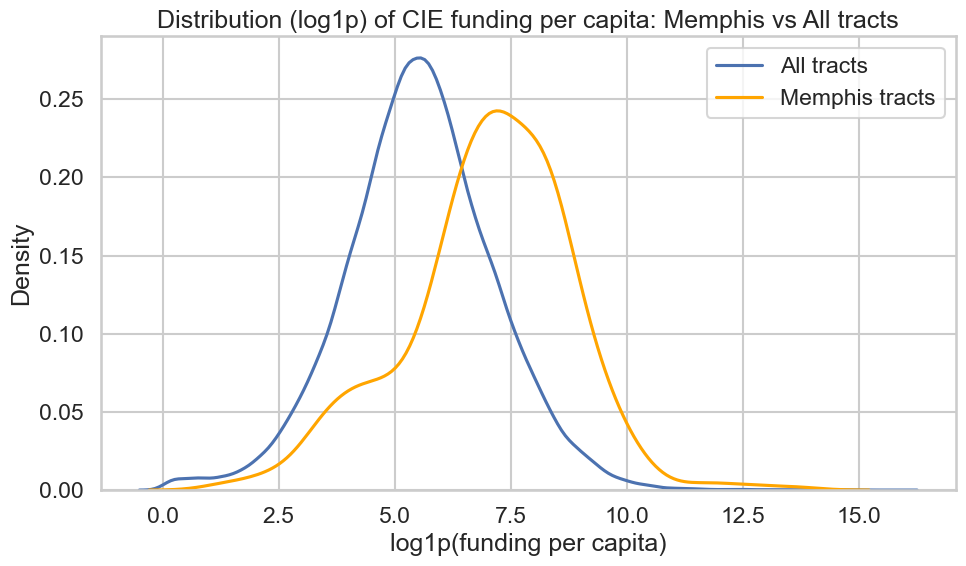

Median CIE funding per capita - All tracts: $251.28
Median CIE funding per capita - Memphis tracts: $1,299.08

Interpretation note (write this into your report):
- If Memphis median funding_per_capita is well below the national tract median, this is a sign of underinvestment in community funding programs relative to other tracts.
- Combine this with BFS (high business applications) and SBA ($ low) to show supply (talent) vs capital mismatch.


In [6]:
# 5. Comparison visuals: show BFS applications timeline or total vs SBA loan dollars and show CIE funding per capita distribution
# 
#  - plot BFS apps over time (if BFS has a time field)
#  - show SBA loan dollars over time or overall
#  - show a distribution comparison of funding_per_capita (CIE) for Memphis vs all tracts

# BFS timeline (if BFS has 'date' or 'year' column)
time_col = next((c for c in bfs.columns if 'date' in c.lower() or 'year' in c.lower() or 'period' in c.lower()), None)
apps_col = possible_apps_col  # from earlier detection

if time_col and apps_col:
    # aggregate apps by time for Memphis rows
    bfs[time_col] = pd.to_datetime(bfs[time_col], errors='coerce', utc=True)
    mem_bfs_time = bfs[bfs[possible_msa_col].str.contains('Memphis', case=False, na=False)].groupby(bfs[time_col].dt.to_period('M'))[apps_col].sum().reset_index()
    mem_bfs_time[time_col] = mem_bfs_time[time_col].dt.to_timestamp()
    plt.figure(figsize=(12,5))
    sns.lineplot(data=mem_bfs_time, x=time_col, y=apps_col, marker='o')
    plt.title('New business applications in Memphis (BFS) over time')
    plt.ylabel('Applications')
    plt.tight_layout()
    plt.savefig(os.path.join(OUT,'bfs_memphis_apps_time.png'))
    plt.show()
else:
    print("Skipping BFS timeline (no clear time column or apps column).")

# SBA dollars over time (if year_col and amount_col exist)
if year_col and amount_col:
    try:
        sba_by_year = sba.groupby(year_col)[amount_col].sum().reset_index()
        plt.figure(figsize=(10,5))
        sns.lineplot(data=sba_by_year, x=year_col, y=amount_col, marker='o')
        plt.title('SBA loan dollars by year (all records in file)')
        plt.ylabel('Total SBA dollars')
        plt.tight_layout()
        plt.savefig(os.path.join(OUT,'sba_dollars_by_year.png'))
        plt.show()
    except Exception as e:
        print("Could not plot SBA by year due to:", e)
else:
    print("SBA year/amount columns not both present — skipping SBA time series.")

# Distribution of CIE funding per capita: Memphis vs All tracts
all_by_tract = cie.groupby('Census Tract').agg({
    'Amount':'sum','Tract Population':'first'
}).reset_index()
all_by_tract['funding_per_capita'] = all_by_tract['Amount'] / all_by_tract['Tract Population'].replace({0:np.nan})

mem_by_tract = all_by_tract[all_by_tract['Census Tract'].isin(cie[cie['is_Memphis']]['Census Tract'].unique())].copy()

plt.figure(figsize=(10,6))
sns.kdeplot(np.log1p(all_by_tract['funding_per_capita'].dropna()), label='All tracts', bw_adjust=1.0)
sns.kdeplot(np.log1p(mem_by_tract['funding_per_capita'].dropna()), label='Memphis tracts', bw_adjust=1.0, color='orange')
plt.title('Distribution (log1p) of CIE funding per capita: Memphis vs All tracts')
plt.xlabel('log1p(funding per capita)')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(OUT,'cie_funding_percapita_kde.png'))
plt.show()

# Simple numeric comparison
print("Median CIE funding per capita - All tracts: ${:,.2f}".format(all_by_tract['funding_per_capita'].median()))
print("Median CIE funding per capita - Memphis tracts: ${:,.2f}".format(mem_by_tract['funding_per_capita'].median()))

# Basic interpretation note (I will write it plainly)
print("\nInterpretation note (write this into your report):")
print("- If Memphis median funding_per_capita is well below the national tract median, this is a sign of underinvestment in community funding programs relative to other tracts.")
print("- Combine this with BFS (high business applications) and SBA ($ low) to show supply (talent) vs capital mismatch.")


In [7]:
# 6. Statistical test + simple regression
# Mann-Whitney U test: are per-capita funding distributions different?
mem_vals = mem_by_tract['funding_per_capita'].dropna()
other_vals = all_by_tract.loc[~all_by_tract['Census Tract'].isin(mem_by_tract['Census Tract']), 'funding_per_capita'].dropna()

if len(mem_vals) > 0 and len(other_vals) > 0:
    u, p = stats.mannwhitneyu(mem_vals, other_vals, alternative='two-sided')
    print("Mann-Whitney U p-value comparing per-capita funding Memphis vs others:", p)
else:
    print("Not enough data for Mann-Whitney test.")

# Regression: log(1 + funding_per_capita) on income_pct and Memphis dummy
# We have income pct in the original CIE rows; aggregate to tract-level income_pct as first observed
income_map = cie.groupby('Census Tract')['Tract Median Family Income as Percent of MSA Median Family Income'].first().reset_index()
reg_df = all_by_tract.merge(income_map, on='Census Tract', how='left')
reg_df['log_fpc'] = np.log1p(reg_df['funding_per_capita'].fillna(0))
reg_df['is_Memphis'] = reg_df['Census Tract'].isin(mem_by_tract['Census Tract']).astype(int)

# dropna on regressors
reg_df2 = reg_df.dropna(subset=['log_fpc','Tract Median Family Income as Percent of MSA Median Family Income'])
print("Regression sample size:", len(reg_df2))

if len(reg_df2) > 50:
    X = sm.add_constant(reg_df2[['Tract Median Family Income as Percent of MSA Median Family Income','is_Memphis']])
    y = reg_df2['log_fpc']
    model = sm.OLS(y, X).fit(cov_type='HC3')
    print(model.summary())
    coef_mem = model.params.get('is_Memphis', None)
    print("\nInterpretation: is_Memphis coefficient:", coef_mem)
else:
    print("Not enough data for regression with available income_pct information.")


Mann-Whitney U p-value comparing per-capita funding Memphis vs others: 1.800435086938211e-74
Regression sample size: 84511
                            OLS Regression Results                            
Dep. Variable:                log_fpc   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     264.9
Date:                Wed, 05 Nov 2025   Prob (F-statistic):          2.11e-115
Time:                        05:33:15   Log-Likelihood:            -1.6105e+05
No. Observations:               84511   AIC:                         3.221e+05
Df Residuals:                   84508   BIC:                         3.221e+05
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                                                                        coef    std err

In [8]:
# 7. HOLC area descriptions - I only have the textual area descriptions (holc_ad_data.csv).
# This is qualitative evidence — I'll extract the HOLC 'area_id' and grade mentions and show counts.
# The holc_ad_data.csv file (per the repo) contains area descriptions and area_id which maps to polygons on Mapping Inequality.

print("HOLC desc columns sample:", holc_desc.columns[:40].tolist())
display(holc_desc.head())

# Typical holc_ad_data fields: area_id, area_name, form_type, description_of_terrain, foreign_born_nationality, etc.
# I'll show top area_id counts and extract common words in descriptions for Memphis if the file contains city info.

# Try to filter to Memphis area descriptions if there is a city or area name column
city_col = next((c for c in holc_desc.columns if 'city' in c.lower() or 'place' in c.lower() or 'area' in c.lower()), None)
print("Detected possible HOLC city/area column:", city_col)

if city_col:
    mem_holc_text = holc_desc[holc_desc[city_col].str.contains('Memphis', case=False, na=False)]
    print("HOLC description rows mentioning Memphis:", len(mem_holc_text))
    display(mem_holc_text.head())
else:
    print("No clear city/area column auto-detected. Show the first 50 rows to inspect.")
    display(holc_desc.head(50))

# Quick textual summary: find top words in the 'description' fields to show the types of comments HOLC used
desc_col = next((c for c in holc_desc.columns if 'description' in c.lower()), None)
if desc_col:
    texts = " ".join(holc_desc[desc_col].dropna().astype(str).tolist()).lower()
    # simple stopword-light split and frequency
    stop = set(["the","and","of","in","to","by","a","with","for","on","that","is","this"])
    words = [w.strip(".,;:()[]'\"") for w in texts.split() if w not in stop and len(w)>3]
    freq = pd.Series(words).value_counts().head(20)
    print("Top words in HOLC area descriptions:")
    display(freq)
else:
    print("No free-text 'description' field detected in holc_ad_data.csv.")


HOLC desc columns sample: ['the_geom', 'cartodb_id', 'area_id', 'cat_id', 'sub_cat_id', '_order', 'data', 'note']


,the_geom,cartodb_id,area_id,cat_id,sub_cat_id,_order,data,note
0,NaN,26868,414,0.0,NaN,NaN,Greater Cleveland,NaN
1,NaN,26869,414,1.0,a,1,Gradually,NaN
2,NaN,34180,650,1.0,NaN,NaN,Topography level and small canyon. Residents f...,NaN
3,NaN,34415,813,7.0,NaN,12,NaN,NaN
4,NaN,34416,813,7.0,NaN,13,2000-3400,NaN


Detected possible HOLC city/area column: area_id


AttributeError: Can only use .str accessor with string values!

In [9]:
# 8. Eviction trends — show eviction filing counts or rates over monthly time series
print("Eviction columns sample:", ev.columns[:40].tolist())
display(ev.head())

# Common Eviction Lab columns might include 'year','month','filings','filing_rate','city','county'
# Try to detect a monthly time column
date_col = None
for c in ev.columns:
    if 'date' in c.lower() or ('year' in c.lower() and 'month' in ev.columns):
        date_col = c
        break

# If separate year and month columns
if 'year' in [c.lower() for c in ev.columns] and 'month' in [c.lower() for c in ev.columns]:
    # create a datetime column
    ev['year'] = ev[[c for c in ev.columns if c.lower()=='year'][0]]
    ev['month'] = ev[[c for c in ev.columns if c.lower()=='month'][0]]
    ev['date'] = pd.to_datetime(ev['year'].astype(str) + "-" + ev['month'].astype(str) + "-01", errors='coerce')
    date_col = 'date'

if date_col:
    # pick a filings column if present
    filings_col = next((c for c in ev.columns if 'fil' in c.lower() or 'case' in c.lower()), None)
    if filings_col:
        ev_time = ev.groupby('date')[filings_col].sum().reset_index()
        plt.figure(figsize=(10,5))
        sns.lineplot(data=ev_time, x='date', y=filings_col, marker='o')
        plt.title('Eviction filings in Memphis area (monthly)')
        plt.ylabel('Filings')
        plt.tight_layout()
        plt.savefig(os.path.join(OUT,'eviction_filings_memphis.png'))
        plt.show()
    else:
        print("No obvious 'filings' column found; inspect eviction dataframe above and set filings_col manually.")
else:
    print("No date information detected; display eviction data sample above for inspection.")


Eviction columns sample: ['type', 'GEOID', 'racial_majority', 'month', 'filings_2020', 'filings_avg', 'filings_avg_prepandemic_baseline', 'last_updated']


,type,GEOID,racial_majority,month,filings_2020,filings_avg,filings_avg_prepandemic_baseline,last_updated
0,Census Tract,47157000100,White,01/2020,5,6.5,8.00,NaN
1,Census Tract,47157000100,White,02/2020,9,7.0,3.75,NaN
2,Census Tract,47157000100,White,03/2020,6,7.0,5.00,NaN
3,Census Tract,47157000100,White,04/2020,0,5.5,4.25,NaN
4,Census Tract,47157000100,White,05/2020,0,10.0,3.75,NaN


KeyError: 'date'